In [1]:
import pandas as pd
import numpy as np

In [3]:
trainLoad = pd.read_csv("clicks_train.csv")
testLoad = pd.read_csv("clicks_test.csv")

In [ ]:
# train = trainLoad[0:1000001]
train = trainLoad
test = trainLoad[1000002:1000002+10000]
displayid = 1
totalDis = dict()
eachDis = []
totalLen = len(train)
for i in range(totalLen):
    if (train.loc[i]["display_id"] == displayid):
        eachDis.append((train.loc[i]["ad_id"], train.loc[i]["clicked"]))
    else:
        totalDis[displayid] = eachDis  
        displayid += 1
        eachDis = list()
        eachDis.append((train.loc[i]["ad_id"], train.loc[i]["clicked"]))

In [52]:
# better method to count and the original one is wrong!! log(1/7) + log(2/5) ... log(1+2/5+7)
# import
import math
# create space
trainResult = dict()
lengthDisplayCount = dict()
clickAdCount = dict()
# count without laplace smoothing
for eachDisIndex in totalDis:
    for eachAd in totalDis[eachDisIndex]:
        if eachAd[0] not in lengthDisplayCount:
            lengthDisplayCount[eachAd[0]] = len(totalDis[eachDisIndex])
            clickAdCount[eachAd[0]] = eachAd[1]
        else:
            lengthDisplayCount[eachAd[0]] += len(totalDis[eachDisIndex])
            clickAdCount[eachAd[0]] += eachAd[1]
# normalize 
for eachIndex in lengthDisplayCount:
    if clickAdCount[eachIndex] == 0:
        trainResult[eachIndex] = -float('inf')
    else:
        trainResult[eachIndex] = math.log(float(clickAdCount[eachIndex])/float(lengthDisplayCount[eachIndex]))


In [53]:
# use naive base to make prediction
import random
from copy import deepcopy


# add click column into test
testResult = deepcopy(test)
testLen = len(testResult)
for i in range(0,testLen):
    testResult.set_value(i+1000002, 'clicked', 0)
    
# del testResult['clicked']
# testLen = len(testResult)
# clicks = [0]*testLen
# seriesDesired = pd.Series(clicks)
# testResult['clicked'] = seriesDesired

# make preduction for test
# get first display ID
displayID = testResult.loc[1000002+0]["display_id"]
# set maxProb to be -inf
maxPro = -float('inf')
maxset = []

# # loop to find the prection for testResult
for i in range(testLen):
    if displayID == testResult.loc[1000002+i]["display_id"]:
        # the same displayID
        adID = testResult.loc[1000002+i]['ad_id']
        if adID in trainResult:
            # if such value get trained
            pro = trainResult[adID]
        else:
            # if such value does not get trained
            pro = -float('inf')
        # find the maximum ad to click
        if pro > maxPro:
            maxPro = pro
            maxset = []
            maxset.append((1000002+i, adID))
        elif pro == maxPro:
            maxset.append((1000002+i, adID))
    else:
        # different displayID
        # find the max for last
        if len(maxset) == 1:
            maxvalue = maxset[0]
            index = maxvalue[0]
        else:
            maxvalue = random.sample(maxset, 1)
            index = maxvalue[0][0]
        testResult.set_value(index, 'clicked', 1)
                
        # start next
        adID = testResult.loc[1000002+i]['ad_id']
        if adID in trainResult:
            # if such value get trained
            pro = trainResult[adID]
        else:
            # if such value does not get trained
            pro = -float('inf')
        maxPro = pro
        maxset = []
        maxset.append((i+1000002, adID))
        displayID = testResult.loc[1000002+i]["display_id"]
    if i == testLen-1:
        if len(maxset) == 1:
            maxvalue = maxset[0]
            index = maxvalue[0]
        else:
            maxvalue = random.sample(maxset, 1)
            index = maxvalue[0][0]
        testResult.set_value(index, 'clicked', 1)   



In [57]:
# random guess
import random
from copy import deepcopy

# add click column into test
testResult = deepcopy(test)
testLen = len(testResult)
for i in range(0,testLen):
    testResult.set_value(i+1000002, 'clicked', 0)
    
# get first display ID
displayID = testResult.loc[1000002+0]["display_id"]
# set maxProb to be -inf
maxPro = -float('inf')
maxset = []

# # loop to find the prection for testResult
for i in range(testLen):
    if displayID == testResult.loc[1000002+i]["display_id"]:
        maxset.append((1000002+i, adID))
    else:
        # different displayID
        maxvalue = random.sample(maxset, 1)
        index = maxvalue[0][0]
        testResult.set_value(index, 'clicked', 1)   
        # start next
        maxPro = pro
        maxset = []
        maxset.append((i+1000002, adID))
        displayID = testResult.loc[1000002+i]["display_id"]
    if i == testLen-1:
        maxvalue = random.sample(maxset, 1)
        index = maxvalue[0][0]
        testResult.set_value(index, 'clicked', 1)   



In [58]:
displayID = testResult.loc[1000002+0]["display_id"]
totalCount = 0
count = 0
for i in range(testLen):
    if testResult.loc[1000002+i]["clicked"] == test.loc[1000002+i]["clicked"] and test.loc[1000002+i]["clicked"] == 1:
        count += 1
    if displayID != testResult.loc[1000002+i]["display_id"]:
        totalCount += 1
        displayID = testResult.loc[1000002+i]["display_id"]
print float(count)/float(totalCount)
    

0.215291750503


In [60]:
import numpy as np
import matplotlib.pyplot as plt

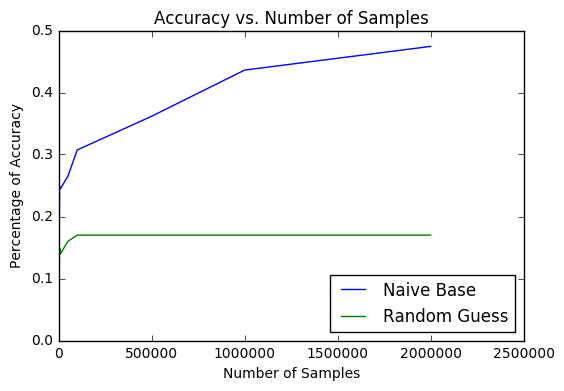

In [72]:
# make plot for poster
x = [0, 5002, 10002, 50005, 100008, 500011, 1000001, 2000002]
y = [0, 0.2484909, 0.2449698, 0.2650905, 0.3073440, 0.3616700, 0.4361667, 0.4743460]
yGuess = [0, 0.15, 0.14, 0.16, 0.17, 0.17, 0.17, 0.17]
xArray = np.array(x, np.int32)
yArray = np.array(y, np.float)
yGuessArray = np.array(yGuess, np.float)
plt.plot(xArray, yArray, label='Naive Base')
plt.plot(xArray, yGuessArray, label='Random Guess')
plt.legend(loc='lower right')
plt.xlabel('Number of Samples')
plt.ylabel('Percentage of Accuracy')
plt.title('Accuracy vs. Number of Samples')
plt.show()